In [1]:
# included modules necessary for the code for this notebook.
import xarray as xr
import os
import numpy as np
import gsw
from netCDF4 import Dataset
import glob  
import netCDF4 as nc
import numpy.ma as ma
import matplotlib.pyplot as plt
import cmocean
from numpy import savetxt
from scipy.stats import skew
import pandas as pd
import csv
from scipy.signal import butter, filtfilt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


This involves breaking down the components of the kinetic energy flux calculations (see the KE flux notebook for the different components of the computations)
The point is to show the equi-partitioning of the strain and divergence components of the flux and hypothesised in related simulated works, but with observational data.
I have broken down the components of the flux and load them in here

In [2]:
# Again, reference the KE flux notebook to see how each component is calculated, and equation 1 in the manuscript
pidiverg = 
pinormal = 
pishear = 
piflux = pinormal - pishear - pidiverg

In [1]:
# # creating the time series over the 12 years by averaging over the Santa Barbara Channel, as done previously
divergence7 = np.nanmean(pidiverg[:,61:78,28:62], axis=(1,2))
# normal7 = np.nanmean(pinormal[:,61:78,28:62], axis=(1,2))
# shear7 = np.nanmean(pishear[:,61:78,28:62], axis=(1,2))

In [2]:
pi7 = np.nanmean(piflux[:,61:78,28:62], axis=(1,2))

Breaking it apart to account for the gaps in the HF radar data as done in the previous timeseries, and applying the butterworth filter to smooth out the anomalies

In [8]:
pi1 = pi7[0:10944]
pi2 = pi7[11357:22325]
pi3 = pi7[23736:26616]
pi4 = pi7[27356:35396]
pi5 = pi7[36138:98946]
pi6 = pi7[99658:104074]


In [9]:
n1 = normal7[0:10944]
n2 = normal7[11357:22325]
n3 = normal7[23736:26616]
n4 = normal7[27356:35396]
n5 = normal7[36138:98946]
n6 = normal7[99658:104074]


In [10]:
s1 = shear7[0:10944]
s2 = shear7[11357:22325]
s3 = shear7[23736:26616]
s4 = shear7[27356:35396]
s5 = shear7[36138:98946]
s6 = shear7[99658:104074]


In [11]:
d1 = divergence7[0:10944]
d2 = divergence7[11357:22325]
d3 = divergence7[23736:26616]
d4 = divergence7[27356:35396]
d5 = divergence7[36138:98946]
d6 = divergence7[99658:104074]


In [12]:
# seasonal average to entire wind work
seasonalpi1 = []
seasonalpi2 = []
seasonalpi3 = []
seasonalpi4 = []
seasonalpi5 = []
seasonalpi6 = []

for p in range(0, (len(pi1))):
    seasonalpi1.append(np.nanmean(pi1[p:p+2193]))
    
for p in range(0, (len(pi2))):
    seasonalpi2.append(np.nanmean(pi2[p:p+2193]))
    
for p in range(0, (len(pi3))):
    seasonalpi3.append(np.nanmean(pi3[p:p+2193]))
    
for p in range(0, (len(pi4))):
    seasonalpi4.append(np.nanmean(pi4[p:p+2193]))
    
for p in range(0, (len(pi5))):
    seasonalpi5.append(np.nanmean(pi5[p:p+2193]))
    
for p in range(0, (len(pi6))):
    seasonalpi6.append(np.nanmean(pi6[p:p+2193]))

In [13]:
# seasonal average to entire wind work
seasonals1 = []
seasonals2 = []
seasonals3 = []
seasonals4 = []
seasonals5 = []
seasonals6 = []

for p in range(0, (len(s1))):
    seasonals1.append(np.nanmean(s1[p:p+2193]))
    
for p in range(0, (len(s2))):
    seasonals2.append(np.nanmean(s2[p:p+2193]))
    
for p in range(0, (len(s3))):
    seasonals3.append(np.nanmean(s3[p:p+2193]))
    
for p in range(0, (len(s4))):
    seasonals4.append(np.nanmean(s4[p:p+2193]))
    
for p in range(0, (len(s5))):
    seasonals5.append(np.nanmean(s5[p:p+2193]))
    
for p in range(0, (len(s6))):
    seasonals6.append(np.nanmean(s6[p:p+2193]))

In [14]:
# seasonal average to entire wind work
seasonaln1 = []
seasonaln2 = []
seasonaln3 = []
seasonaln4 = []
seasonaln5 = []
seasonaln6 = []

for p in range(0, (len(n1))):
    seasonaln1.append(np.nanmean(n1[p:p+2193]))
    
for p in range(0, (len(n2))):
    seasonaln2.append(np.nanmean(n2[p:p+2193]))
    
for p in range(0, (len(n3))):
    seasonaln3.append(np.nanmean(n3[p:p+2193]))
    
for p in range(0, (len(n4))):
    seasonaln4.append(np.nanmean(n4[p:p+2193]))
    
for p in range(0, (len(n5))):
    seasonaln5.append(np.nanmean(n5[p:p+2193]))
    
for p in range(0, (len(n6))):
    seasonaln6.append(np.nanmean(n6[p:p+2193]))

In [15]:
# seasonal average to entire wind work
seasonald1 = []
seasonald2 = []
seasonald3 = []
seasonald4 = []
seasonald5 = []
seasonald6 = []

for p in range(0, (len(d1))):
    seasonald1.append(np.nanmean(d1[p:p+2193]))
    
for p in range(0, (len(d2))):
    seasonald2.append(np.nanmean(d2[p:p+2193]))
    
for p in range(0, (len(d3))):
    seasonald3.append(np.nanmean(d3[p:p+2193]))
    
for p in range(0, (len(d4))):
    seasonald4.append(np.nanmean(d4[p:p+2193]))
    
for p in range(0, (len(d5))):
    seasonald5.append(np.nanmean(d5[p:p+2193]))
    
for p in range(0, (len(d6))):
    seasonald6.append(np.nanmean(d6[p:p+2193]))

In [16]:
hours = len(seasonalpi1)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonalpi1
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used earlier
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonalpi1 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [17]:
hours = len(seasonalpi2)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonalpi2
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonalpi2 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [18]:
hours = len(seasonalpi3)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonalpi3
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonalpi3 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [19]:
hours = len(seasonalpi4)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonalpi4
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonalpi4 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [20]:
hours = len(seasonalpi5)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonalpi5
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonalpi5 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [21]:
hours = len(seasonalpi6)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonalpi6
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonalpi6 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [22]:
# concatenate each section but fill in gaps with NaN values
# since seasonally averaged then concatenated, need to cut off some values which will affect the nan arrays too
nan1 = np.full(1464, np.nan)
nan2 = np.full(744, np.nan)
nan3 = np.full(720, np.nan)
Flux = np.concatenate((filteredseasonalpi1, nan1, filteredseasonalpi2, nan1, filteredseasonalpi3, nan2, filteredseasonalpi4, nan2, filteredseasonalpi5, nan3, filteredseasonalpi6), axis=0)


In [23]:
hours = len(seasonaln1)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonaln1
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonaln1 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [24]:
hours = len(seasonaln2)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonaln2
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonaln2 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [25]:
hours = len(seasonaln3)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonaln3
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonaln3 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [26]:
hours = len(seasonaln4)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonaln4
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonaln4 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [27]:
hours = len(seasonaln5)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonaln5
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonaln5 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [28]:
hours = len(seasonaln6)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonaln6
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonaln6 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [29]:
# concatenate each section but fill in gaps with NaN values
# since seasonally averaged then concatenated, need to cut off some values which will affect the nan arrays too
nan1 = np.full(1464, np.nan)
nan2 = np.full(744, np.nan)
nan3 = np.full(720, np.nan)
Normal = np.concatenate((filteredseasonaln1, nan1, filteredseasonaln2, nan1, filteredseasonaln3, nan2, filteredseasonaln4, nan2, filteredseasonaln5, nan3, filteredseasonaln6), axis=0)


In [30]:
hours = len(seasonals1)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonals1
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonals1 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [31]:
hours = len(seasonals2)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonals2
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonals2 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [32]:
hours = len(seasonals3)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonals3
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonals3 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [33]:
hours = len(seasonals4)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonals4
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonals4 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [34]:
hours = len(seasonals5)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonals5
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonals5 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [35]:
hours = len(seasonals6)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonals6
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonals6 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [36]:
# concatenate each section but fill in gaps with NaN values
# since seasonally averaged then concatenated, need to cut off some values which will affect the nan arrays too
nan1 = np.full(1464, np.nan)
nan2 = np.full(744, np.nan)
nan3 = np.full(720, np.nan)
Shear = np.concatenate((filteredseasonals1, nan1, filteredseasonals2, nan1, filteredseasonals3, nan2, filteredseasonals4, nan2, filteredseasonals5, nan3, filteredseasonals6), axis=0)


In [37]:
hours = len(seasonald1)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonald1
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonald1 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [38]:
hours = len(seasonald2)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonald2
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonald2 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [39]:
hours = len(seasonald3)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonald3
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonald3 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [40]:
hours = len(seasonald4)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonald4
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonald4 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [41]:
hours = len(seasonald5)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonald5
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonald5 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [42]:
hours = len(seasonald6)
t = np.arange(hours)  # Time vector in hours to pass through the butterworth filter function
data = seasonald6
T = 1  # Sampling interval in hours
fs = 1 / T  # Sampling frequency in cycles per hour
nyquist = 0.5 * fs  # Nyquist frequency in cycles per hour

cutoff = 1 / 732  # Desired cutoff frequency in cycles per hour (1 cycle per x months)
normal_cutoff = cutoff / nyquist  # Normalise by Nyquist frequency

# same butterworth_filter function used above
def butterworth_filter(data, normal_cutoff, order=5, filter_type='low'):
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    y = filtfilt(b, a, data)
    return y

filteredseasonald6 = butterworth_filter(data, normal_cutoff, order=5, filter_type='low')

In [43]:
# concatenate each section but fill in gaps with NaN values
# since seasonally averaged then concatenated, need to cut off some values which will affect the nan arrays too
nan1 = np.full(1464, np.nan)
nan2 = np.full(744, np.nan)
nan3 = np.full(720, np.nan)
Diverg = np.concatenate((filteredseasonald1, nan1, filteredseasonald2, nan1, filteredseasonald3, nan2, filteredseasonald4, nan2, filteredseasonald5, nan3, filteredseasonald6), axis=0)


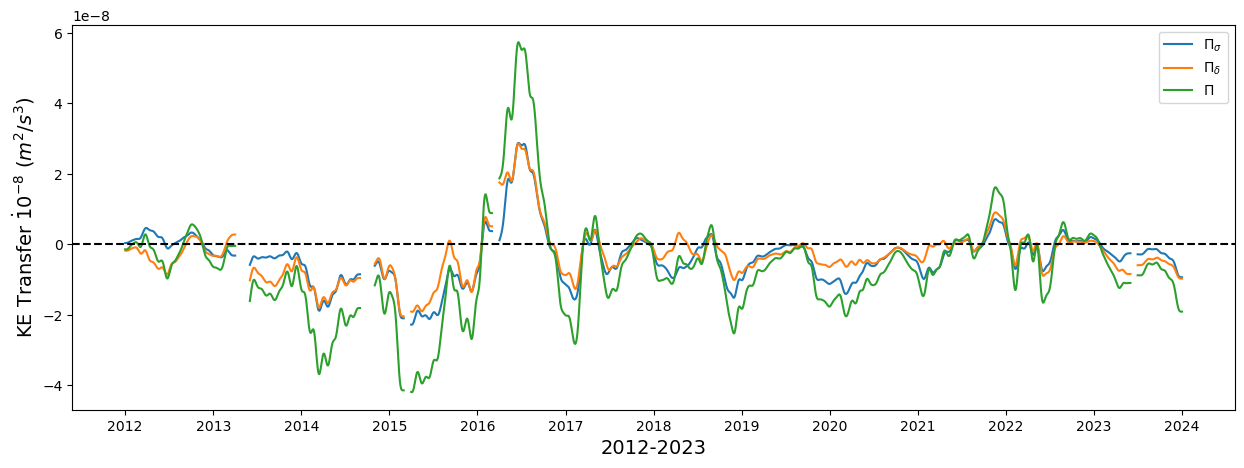

In [44]:
# plotting of the data with labels 
plt.figure(figsize=(15,5))
plt.plot(Normal-np.array(Shear), label=r'$\Pi_{\sigma}$')
plt.plot(-np.array(Diverg), label=r'$\Pi_{\delta}$')
plt.plot(Flux, label=r'$\Pi$')
tickpositions = [0, 8784,17544, 26304, 35064, 43848, 52608, 61368, 70128, 78912, 87672, 96432, 105191]
ticklabels = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'] 
plt.xticks(tickpositions, ticklabels)
plt.legend()
# plt.title('contributions of each term to $\Pi$')
plt.xlabel('2012-2023', fontsize=14)
plt.ylabel('KE Transfer $x 10^{-8}$ ($m^2/s^3$)', fontsize=14)
plt.axhline(y=0, c='k', linestyle='--')
plt.savefig("Componentsofpitimeseries.jpg", dpi=300)
plt.show()


To create the equi-partitioning ratio subplot in Figure 4, you will need to calculate the kinetic energy flux for the different scales, modifying the code in the KE flux notebook as appropriate
Shown in the figure is the ratio at scales 5 km, 7 km, 10 km, and 15 km. 
These were calculated and saved separately and loaded in create the plot below.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


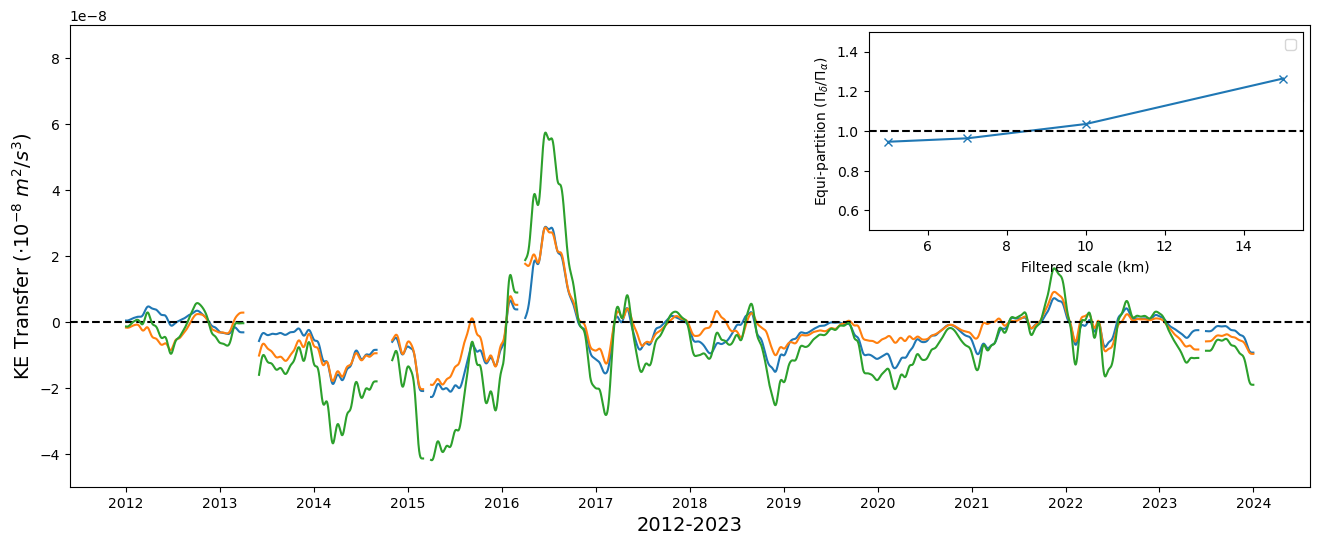

In [119]:
# data plots with labels 
fig, ax = plt.subplots(1, 1, figsize=(16,6))

ax.plot(Normal-np.array(Shear), label=r'$\Pi_{\sigma}$')
ax.plot(-np.array(Diverg), label=r'$\Pi_{\delta}$')
plt.axhline(y=0, c='k', linestyle='--')
ax.plot(Flux, label=r'$\Pi$')
ax.set_xlabel('2012-2023', fontsize=14)
ax.set_ylim(-5e-8, 9e-8)
ax.set_ylabel('KE Transfer ($\cdot 10^{-8}$ $m^2/s^3$)', fontsize=14)
tickpositions = [0, 8784,17544, 26304, 35064, 43848, 52608, 61368, 70128, 78912, 87672, 96432, 105191]
ticklabels = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'] 
plt.xticks(tickpositions, ticklabels)

# ax.set_title("Main Plot with Inset")

# Create the inset axes
inset_ax = inset_axes(ax, width="35%", height="43%", loc="upper right")
inset_ax.plot(scale, ratio, linestyle='-', marker='x')

inset_ax.set_xlabel('Filtered scale (km)')
inset_ax.set_ylabel(r'Equi-partition ($\Pi_{\delta}/\Pi_{\alpha}$)')
inset_ax.set_ylim(0.5,1.5)
plt.axhline(y=1, linestyle='--', c='k')

# Add legend to both plots
ax.legend()
inset_ax.legend()

# Show the plot
plt.savefig("Figure4.jpg", dpi=300)
plt.show()